In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [3]:
df = pd.read_csv(r'c:\Users\User\Downloads\archive\Fifa_world_cup_matches.csv')
df.head(5)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [4]:
#most goals scored by a team
goals_scored = df.groupby('team1')['number of goals team1'].sum() + df.groupby('team2')['number of goals team2'].sum()

goals_scored.sort_values(ascending=False).head(10)

team1
FRANCE         16
ARGENTINA      15
ENGLAND        13
PORTUGAL       12
NETHERLANDS    10
SPAIN           9
BRAZIL          8
CROATIA         8
GERMANY         6
MOROCCO         6
dtype: int64

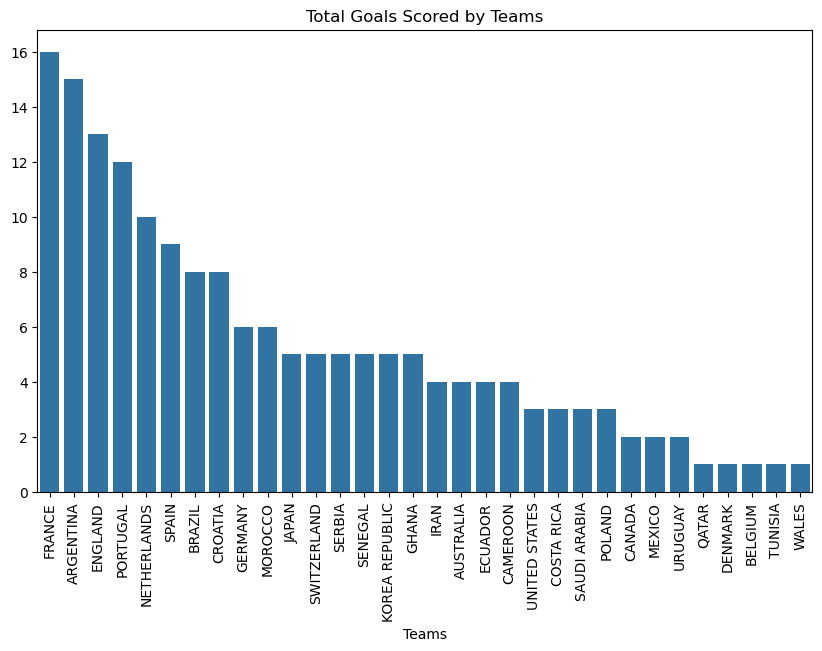

In [5]:
#display it now on a bar chart
goals_scored_sorted = goals_scored.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=goals_scored_sorted.index, y=goals_scored_sorted.values)

# Update the x-axis label to "Teams" and rotate the labels for better readability
plt.xlabel('Teams')
plt.xticks(rotation=90)
plt.title('Total Goals Scored by Teams')
plt.show()

Text(0.5, 0, 'Teams')

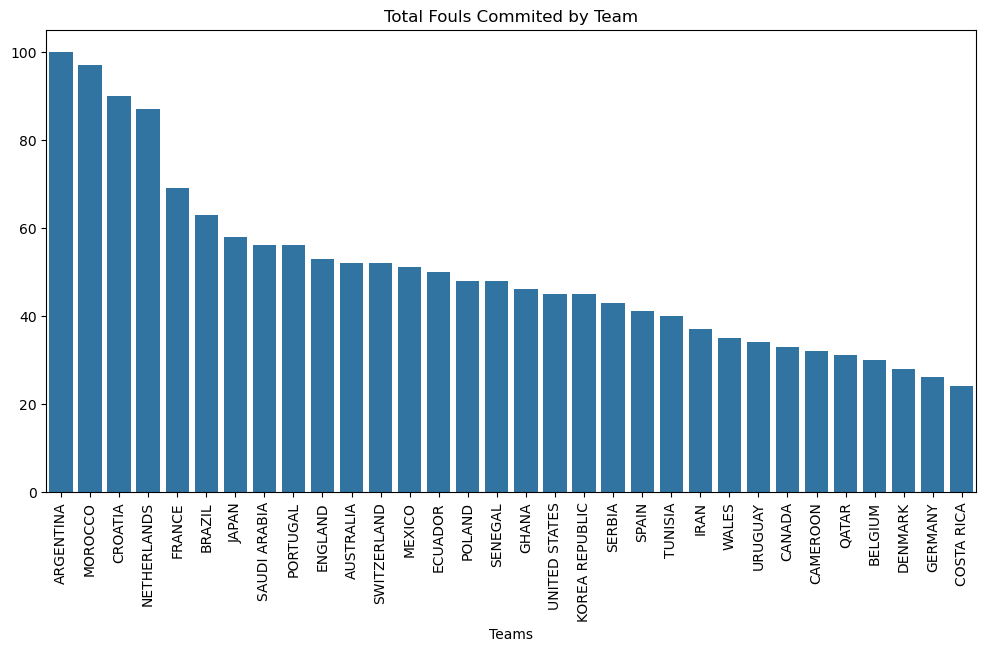

In [12]:
#most fouls comitted
fouls = df.groupby('team1')['fouls against team1'].sum() +df.groupby('team2')['fouls against team2'].sum()
fouls_sorted = fouls.sort_values(ascending=False)

# Plot fouls

plt.figure(figsize=(12,6))
sns.barplot(x=fouls_sorted.index, y=fouls_sorted.values,)
plt.xticks(rotation=90)
plt.title('Total Fouls Commited by Team')
plt.xlabel('Teams')

In [13]:
#the match with the most fouls
df['total_fouls'] = df['fouls against team1'] + df['fouls against team2']
most_fouls_match = df[df['total_fouls'] == df['total_fouls'].max()]

most_fouls_match #the best one btw

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2,total_fouls
57,NETHERLANDS,ARGENTINA,45%,44%,11%,2,2,09 DEC 2022,20 : 00,Quarter-final,...,1,15,5,0,0,91,79,401,323,48


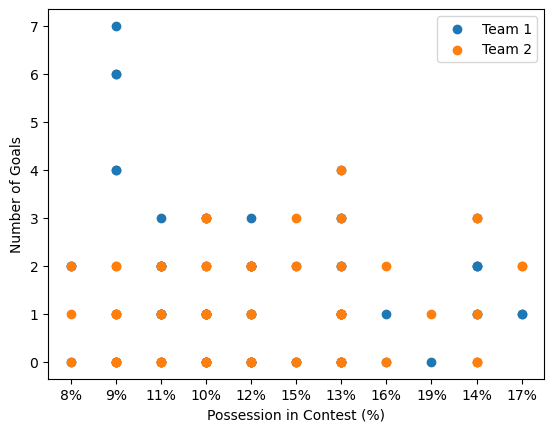

In [19]:
# Impact of possession in contest on number of goals scored:
df['possession team1'] = df['possession team1'].replace('%', '', regex=True)
df['possession team1'] = pd.to_numeric(df['possession team1'], errors='coerce', downcast='float')
df['possession team2'] = df['possession team2'].replace('%', '', regex=True)
df['possession team2'] = pd.to_numeric(df['possession team2'], errors='coerce', downcast='float')

possession_in_contest = df["possession in contest"]
goals_team1 = df["number of goals team1"]
goals_team2 = df["number of goals team2"]

#display it now 
plt.scatter(possession_in_contest, goals_team1, label="Team 1")
plt.scatter(possession_in_contest, goals_team2, label="Team 2")
plt.xlabel("Possession in Contest (%)")
plt.ylabel("Number of Goals")
plt.legend()
plt.show()
